<a href="https://colab.research.google.com/github/coding-dojo-data-science/advanced-ml-practice-solutions/blob/main/DBSCAN_and_Agglomerative_Clustering_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, you will make a toy dataset of two interlocking moons and then try to cluster it using DBSCAN and AgglomerativeClustering.

1. Create moons with the sklearn.datasets.make_moons() function.
  1. Remember to scale the data.

2. Cluster the data with DBSCAN.
  1. Set `min_samples=30`.
  2. Use the NearestNeighbors class to determine a good value for 'eps'.
  3. Create a DBSCAN model and fit it to the data.
  4. Plot the resulting clusters.

3. Cluster the data using AgglomerativeClustering.
  1. Create a dendrogram and find where the average length of the vertical lines are longest.
  2. Create and fit an AgglomerativeClustering model on the data.
  3. Plot the resulting clusters.

# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch

# Create the data

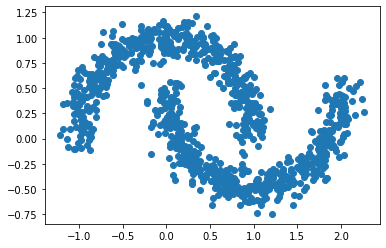

In [ ]:
from sklearn.datasets import make_moons

moons = make_moons(n_samples = 1000,
                   noise=.1,
                   random_state=42)[0]

plt.scatter(moons[:,0], moons[:,1])

# Scale the data

In [ ]:
moons = StandardScaler().fit_transform(moons)

# DBSCAN

### Find a good value for epsilon

In [ ]:
min_samples=30
n_neighbors = NearestNeighbors(n_neighbors=min_samples)
n_neighbors.fit(moons)
distances, indices= n_neighbors.kneighbors(moons)
distances[:5]

array([[0.        , 0.02230357, 0.04586937, 0.06560064, 0.06855968,
        0.08072923, 0.11792255, 0.11881996, 0.13556174, 0.14646141,
        0.16881587, 0.18063795, 0.18099338, 0.18134322, 0.18808798,
        0.20264767, 0.22519061, 0.24076442, 0.24383722, 0.24426192,
        0.25985253, 0.2667944 , 0.26684873, 0.27738285, 0.28001431,
        0.28969078, 0.29596423, 0.29633694, 0.3107646 , 0.3189059 ],
       [0.        , 0.03868558, 0.03944988, 0.06026764, 0.07956838,
        0.09749104, 0.11191234, 0.11241943, 0.11526785, 0.11975328,
        0.12218289, 0.13806558, 0.13815371, 0.15491513, 0.16807696,
        0.17064567, 0.17506851, 0.17537287, 0.17547289, 0.17634217,
        0.17653929, 0.18160442, 0.18378407, 0.18914382, 0.19241878,
        0.21141082, 0.21233084, 0.22063801, 0.22119661, 0.22242699],
       [0.        , 0.08763894, 0.09242477, 0.13573307, 0.15577544,
        0.15874166, 0.17391205, 0.18624522, 0.19047833, 0.23801337,
        0.24430668, 0.26363511, 0.27462977, 0.

In [ ]:
sorted_distances = np.sort(distances[:, min_samples-1])
sorted_distances[:5]

array([0.14650369, 0.14797938, 0.14803976, 0.15245298, 0.15395415])

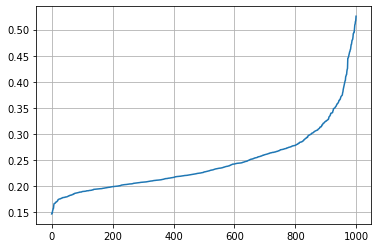

In [ ]:
plt.plot(sorted_distances)
plt.grid();

### for min_samples = 30, it looks like .3 might ba a good epsilon, as the elbow seems to begin there.

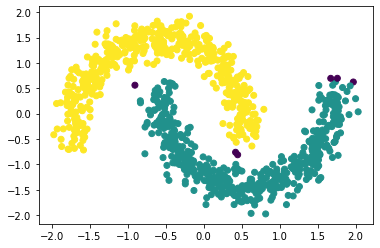

In [ ]:
dbs = DBSCAN(min_samples=min_samples, eps=.3)
dbs.fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=dbs.labels_)

The clustering is not perfect and there are a few samples assigned to the 'noise' cluster.

# Agglomerative Clustering

## Visualize Dendrogram

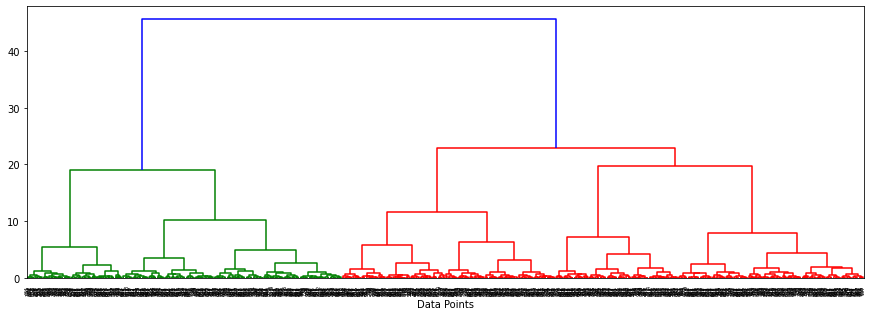

In [ ]:
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(moons, method = 'ward'))
plt.xlabel('Data Points');

Unsurprisingly, it looks like the best number of clusters would be 2, because that's where the vertical lines are, on average, longest.

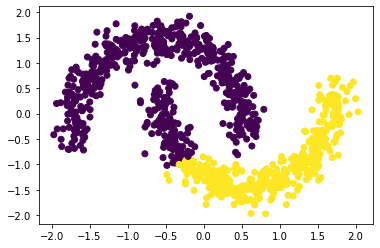

In [ ]:
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=agg.labels_);

Agglomerative clustering seems to have assigned half of the moon on the right to the cluster on the left.  

1. Which algorithm does the best job of clustering this dataset?

The DBSCAN better separated the two moons from each other.

2. Which algorithm is the easiest to tune?

The AgglomerativeClustering was much easier to tune, especially since we already knew how many clusters we wanted.